# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform

def get_param_dict():
    param_dict = {"learning_rate": uniform(0, 1),
              "gamma": uniform(0, 5),
              "max_depth": range(1,10),
              "n_estimators": range(1,300),
               "booster":['gbtree','gblinear','dart']
             }
    return param_dict

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.datasets import load_wine

X, Y = load_wine(return_X_y=True)

count_called = 1

def objfunc(args_list):
    global X, Y, count_called
    
    #print('count_called:',count_called)
    
    count_called = count_called + 1
    results = []
    for hyper_par in args_list:
        clf = XGBClassifier(**hyper_par)
        result = cross_val_score(clf, X, Y, scoring='accuracy').mean()
        results.append(result)
    return results

def get_conf():
    conf = dict()
    conf['batch_size'] = 5
    conf['initial_random'] = 5
    conf['num_iteration'] = 100
    conf['domain_size'] = 5000
    
    return conf

def get_optimal_x():
    param_dict = get_param_dict()
    conf = get_conf()
    tuner = Tuner(param_dict, objfunc,conf)
    results = tuner.maximize()
    return results

In [2]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 20

In [3]:
for i in range(num_of_tries):
    results = get_optimal_x()
    Store_Results.append(results)
    #print(results)
    print(i,":",results['best_objective'])

0 : 0.9331417624521072
1 : 0.9331417624521072
2 : 0.9331417624521072
3 : 0.9331417624521072
4 : 0.9331417624521072
5 : 0.9331417624521072
6 : 0.9331417624521072
7 : 0.9331417624521072
8 : 0.9331417624521072
9 : 0.9331417624521072
10 : 0.9331417624521072
11 : 0.9331417624521072
12 : 0.9331417624521072
13 : 0.9331417624521072
14 : 0.9331417624521072
15 : 0.9331417624521072
16 : 0.9331417624521072
17 : 0.9331417624521072
18 : 0.9331417624521072
19 : 0.9331417624521072


# Extract from the results returned the true optimal values for each iteration

In [10]:
import numpy as np

total_experiments = 20

initial_random = 5

plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

plotting_list = []

for exp in range(total_experiments): #for all exp
    local_list = []
    for itr in plotting_itr: # for all points to plot
        # find the value of optimal parameters in itr+ initial_random
        max_value = np.array(Store_Results[exp]['objective_values'][:itr*5+initial_random]).max()
        local_list.append(max_value)
    plotting_list.append(local_list)

In [11]:
plotting_array = np.array(plotting_list)

In [12]:
Y = []

range_min = -100
range_max = 100
#count range between -1 and 1 and show it
for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [13]:
# Printing Y Values

In [14]:
Y

[0.9259195402298852,
 0.9278639846743296,
 0.9289750957854406,
 0.929808429118774,
 0.9311973180076627,
 0.9325862068965515,
 0.9328639846743293,
 0.9328639846743293,
 0.9328639846743293,
 0.9331417624521071]

In [9]:
plotting_itr

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [22]:
Y_serial = [0.9239750957854407,
 0.9267528735632184,
 0.927308429118774,
 0.928419540229885,
 0.9292528735632185,
 0.9295306513409963,
 0.9295306513409963,
 0.9300862068965519,
 0.9303639846743297]

In [23]:
Y_parallel=[0.9295306513409962,
 0.9306417624521073,
 0.9320306513409962,
 0.9328639846743293,
 0.9331417624521071,
 0.9331417624521071,
 0.9334195402298849,
 0.9334195402298849,
 0.9339750957854405]

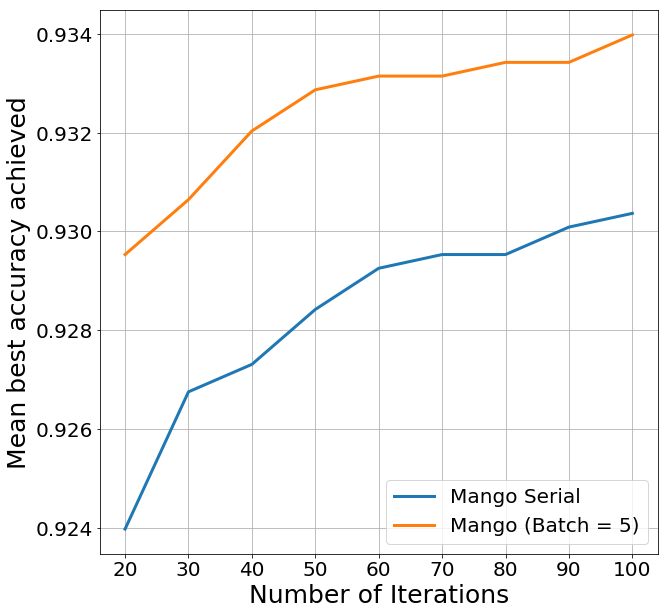

In [25]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y_serial,label = 'Mango Serial',linewidth=3.0) #x, y
plt.plot(plotting_itr,Y_parallel,label = 'Mango (Batch = 5)',linewidth=3.0) #x, y



plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean best accuracy achieved',fontsize=25)
#plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()